In [ ]:
!pip install tf-keras-vis

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)

css_styling()

### Importing data and libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, ReLU, Dense, Dropout, Input
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [4]:
from tensorflow.keras.datasets import fashion_mnist

In [33]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [34]:
X_train.shape

(60000, 28, 28)

In [35]:
from tensorflow.keras.utils import to_categorical

In [36]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Unregularized, unaugmented model

In [37]:
inputs = Input(shape=(28, 28, 1), name="Input")
x = Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="valid")(inputs)
x = ReLU()(x)
x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="valid")(x)
x = ReLU()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Flatten()(x)
x = Dense(units=128)(x)
x = ReLU()(x)
outputs = Dense(units=10, activation="softmax")(x)

In [38]:
model = Model(inputs, outputs)

In [39]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

In [40]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 re_lu_12 (ReLU)             (None, 26, 26, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 re_lu_13 (ReLU)             (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                           

In [41]:
batch_size = 32
epochs = 10

history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test),
)

Epoch 1/10
1875/1875 [==============================] - 230s 119ms/step - loss: 0.7734 - accuracy: 0.8540 - val_loss: 0.3300 - val_accuracy: 0.8804
Epoch 2/10
1875/1875 [==============================] - 215s 115ms/step - loss: 0.2692 - accuracy: 0.9000 - val_loss: 0.3038 - val_accuracy: 0.8899
Epoch 3/10
1875/1875 [==============================] - 214s 114ms/step - loss: 0.2192 - accuracy: 0.9179 - val_loss: 0.3078 - val_accuracy: 0.8905
Epoch 4/10
1875/1875 [==============================] - 213s 114ms/step - loss: 0.1861 - accuracy: 0.9304 - val_loss: 0.3659 - val_accuracy: 0.8838
Epoch 5/10
1875/1875 [==============================] - 212s 113ms/step - loss: 0.1617 - accuracy: 0.9394 - val_loss: 0.3381 - val_accuracy: 0.8965
Epoch 6/10
1875/1875 [==============================] - 215s 115ms/step - loss: 0.1394 - accuracy: 0.9485 - val_loss: 0.3713 - val_accuracy: 0.9014
Epoch 7/10
1875/1875 [==============================] - 232s 124ms/step - loss: 0.1152 - accuracy: 0.9581 - val_

In [47]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.5296 - accuracy: 0.8997


In [48]:
test_loss, test_acc = score

In [49]:
(
    f"Test loss: {test_loss}",
    f"Test acc: {test_acc}",
)

('Test loss: 0.5296468734741211', 'Test acc: 0.8996999859809875')

### Vizualizing filters

In [50]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'Input': <keras.engine.input_layer.InputLayer at 0x181a2e5ae20>,
 'conv2d_8': <keras.layers.convolutional.conv2d.Conv2D at 0x18196c94bb0>,
 're_lu_12': <keras.layers.activation.relu.ReLU at 0x181a25e0be0>,
 'conv2d_9': <keras.layers.convolutional.conv2d.Conv2D at 0x181a2dff0d0>,
 're_lu_13': <keras.layers.activation.relu.ReLU at 0x18196c766d0>,
 'max_pooling2d_4': <keras.layers.pooling.max_pooling2d.MaxPooling2D at 0x18196bba040>,
 'flatten_4': <keras.layers.reshaping.flatten.Flatten at 0x181a2e677c0>,
 'dense_8': <keras.layers.core.dense.Dense at 0x181a2e69e20>,
 're_lu_14': <keras.layers.activation.relu.ReLU at 0x18196c76190>,
 'dense_9': <keras.layers.core.dense.Dense at 0x181a2e69ee0>}

In [ ]:
model.get_layer("conv2d_8").get_weights()

In [53]:
filters, biases = model.layers[1].get_weights()

In [54]:
filters.shape

(3, 3, 1, 32)

In [55]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
print(f'Before Normalisation, Min = {f_min} and Max =  {f_max}')
filters = (filters - f_min) / (f_max - f_min)
print(f'After Normalisation, Min = {filters.min()} and Max =  {filters.max()}')

Before Normalisation, Min = -0.6094602942466736 and Max =  0.20226840674877167
After Normalisation, Min = 0.0 and Max =  1.0


In [56]:
import matplotlib.pyplot as plt

In [61]:
def plot_filters(layer_name):
    filters, biases = model.get_layer(layer_name).get_weights()
    n_filters = filters.shape[-1]
    ix = 1
    plt.figure(figsize=(12, 20))

    for i in range(n_filters):
        f = filters[..., i]

        ax = plt.subplot(n_filters, 4, ix)
        ax.set_xticks([])
        ax.set_yticks([])

        plt.imshow(np.squeeze(f, axis=2), cmap="gray")
        ix += 1

    plt.show()

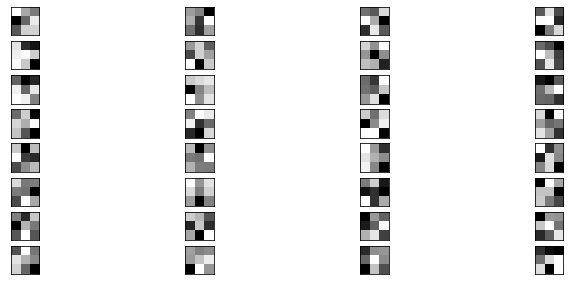

In [62]:
plot_filters("conv2d_8")

### Visualizing feature maps/activations

In [99]:
layer_outputs = [layer.output for layer in model.layers[1:3]]
activation_model = Model(inputs=model.inputs, outputs=layer_outputs)

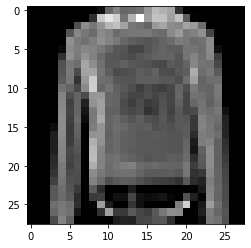

In [108]:
img = X_test[16][np.newaxis, ..., np.newaxis]
plt.imshow(X_test[16], cmap="gray")
plt.show()

In [109]:
activations = activation_model.predict(img)
first_layer_activation, second_layer_activation = activations

1/1 [==============================] - 0s 20ms/step


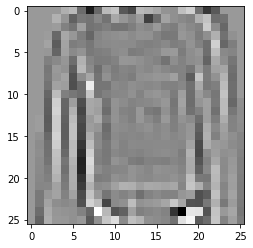

In [110]:
plt.imshow(first_layer_activation[0, :, :, 3], cmap="gray")
plt.show()

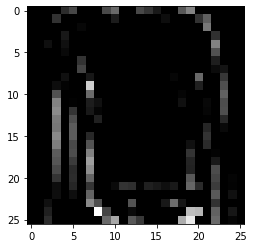

In [111]:
plt.imshow(second_layer_activation[0, :, :, 3], cmap="gray")
plt.show()

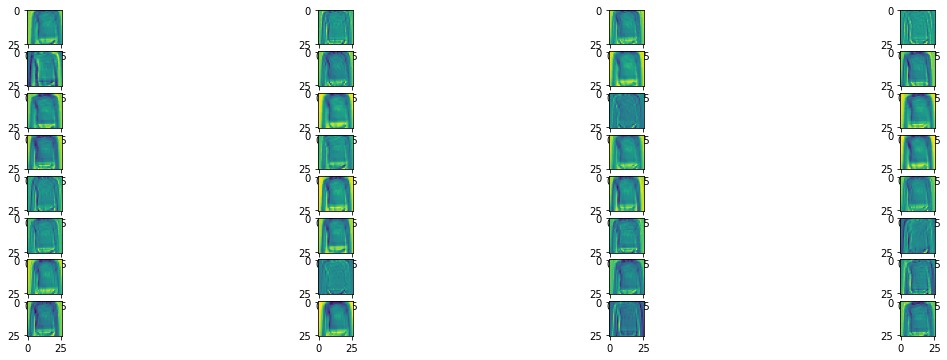

In [112]:
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))

    for row in range(0, row_size):
        for col in range(0, col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='viridis')
            activation_index += 1

display_activation(activations, 4, 8, 0)

## Regularized model

### Augmentation

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
X_train = X_train[..., np.newaxis].astype("float32")
X_test = np.expand_dims(X_test, axis=-1).astype("float32")

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [12]:
X_train /= 255.0
X_test /= 255.0

In [13]:
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.regularizers import l1, l2

In [28]:
inputs = Input(shape=(28, 28, 1), name="Input")
x = Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="valid", kernel_regularizer=l2(l2=0.02))(inputs)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="valid", kernel_regularizer=l2(l2=0.02))(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)

x = Flatten()(x)
x = Dense(units=128)(x)
x = Dropout(0.2)(x)
x = ReLU()(x)
outputs = Dense(units=10, activation="softmax")(x)

In [29]:
model_regd = Model(inputs, outputs)

In [30]:
model_regd.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

In [31]:
model_regd.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_4 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 re_lu_9 (ReLU)              (None, 26, 26, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                           

In [32]:
batch_size = 32
epochs = 10

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest",
)

history = model_regd.fit(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(X_test, y_test),
    steps_per_epoch=X_train.shape[0] // batch_size,
)

Epoch 1/10
1875/1875 [==============================] - 178s 95ms/step - loss: 0.7662 - accuracy: 0.7498 - val_loss: 46.3797 - val_accuracy: 0.7654
Epoch 2/10
1875/1875 [==============================] - 176s 94ms/step - loss: 0.5853 - accuracy: 0.7967 - val_loss: 52.9338 - val_accuracy: 0.7533
Epoch 3/10
1875/1875 [==============================] - 175s 93ms/step - loss: 0.5394 - accuracy: 0.8122 - val_loss: 70.1757 - val_accuracy: 0.7383
Epoch 4/10
1875/1875 [==============================] - 164s 88ms/step - loss: 0.5109 - accuracy: 0.8199 - val_loss: 68.4055 - val_accuracy: 0.7138
Epoch 5/10
1875/1875 [==============================] - 162s 86ms/step - loss: 0.4905 - accuracy: 0.8281 - val_loss: 69.4359 - val_accuracy: 0.7409
Epoch 6/10
1875/1875 [==============================] - 160s 85ms/step - loss: 0.4775 - accuracy: 0.8339 - val_loss: 104.9472 - val_accuracy: 0.6843
Epoch 7/10
1875/1875 [==============================] - 161s 86ms/step - loss: 0.4680 - accuracy: 0.8366 - val_

In [19]:
score = model_regd.evaluate(X_test, y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.2810 - accuracy: 0.9118
